<a href="https://colab.research.google.com/github/Meder11/-ber-data-analysis/blob/main/boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

uploaded = files.upload()

Saving housing.csv to housing.csv


In [21]:
pip install visuals

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import visuals as vs

In [7]:
data = pd.read_csv("housing.csv")
prices = data["MEDV"]
features = data.drop("MEDV", axis=1)

print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


In [8]:
# Calcualtion Statistic
min_price = np.amin(prices)
max_price = np.amax(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)


print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(min_price))
print("Maximum price: ${}".format(max_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429477


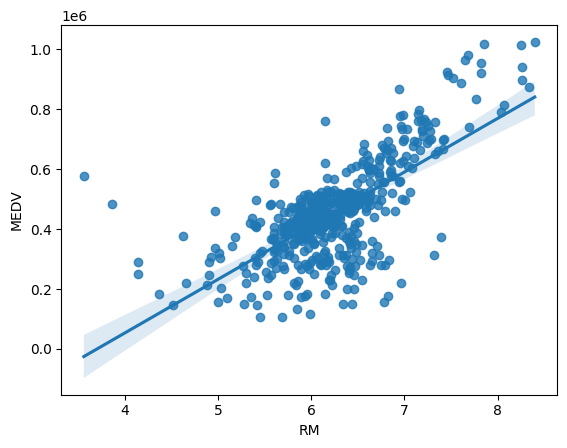

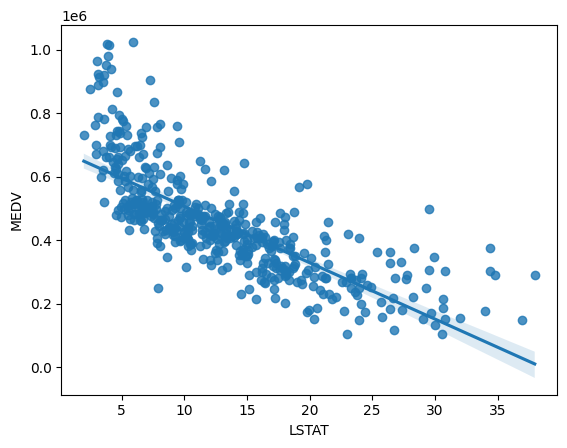

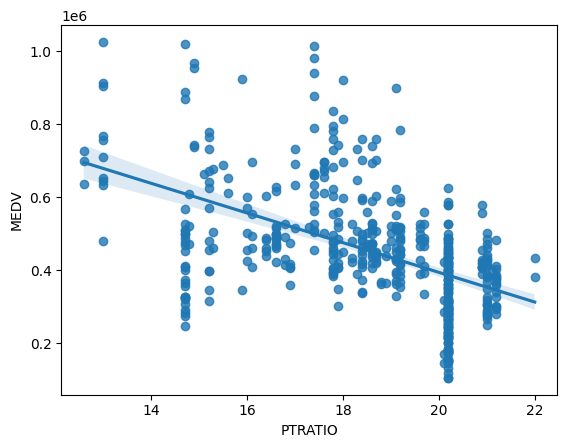

In [13]:
# Feature observation
for var in features.columns:
  sns.regplot(x=data[var], y=prices)
  plt.show()

In [15]:
def performance_metric(y_true, y_predict):
  score = r2_score(y_true, y_predict)
  return score

In [17]:
# Performance calculation
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


In [19]:
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=100)

print("Training and testing split was successful.")

Training and testing split was successful.


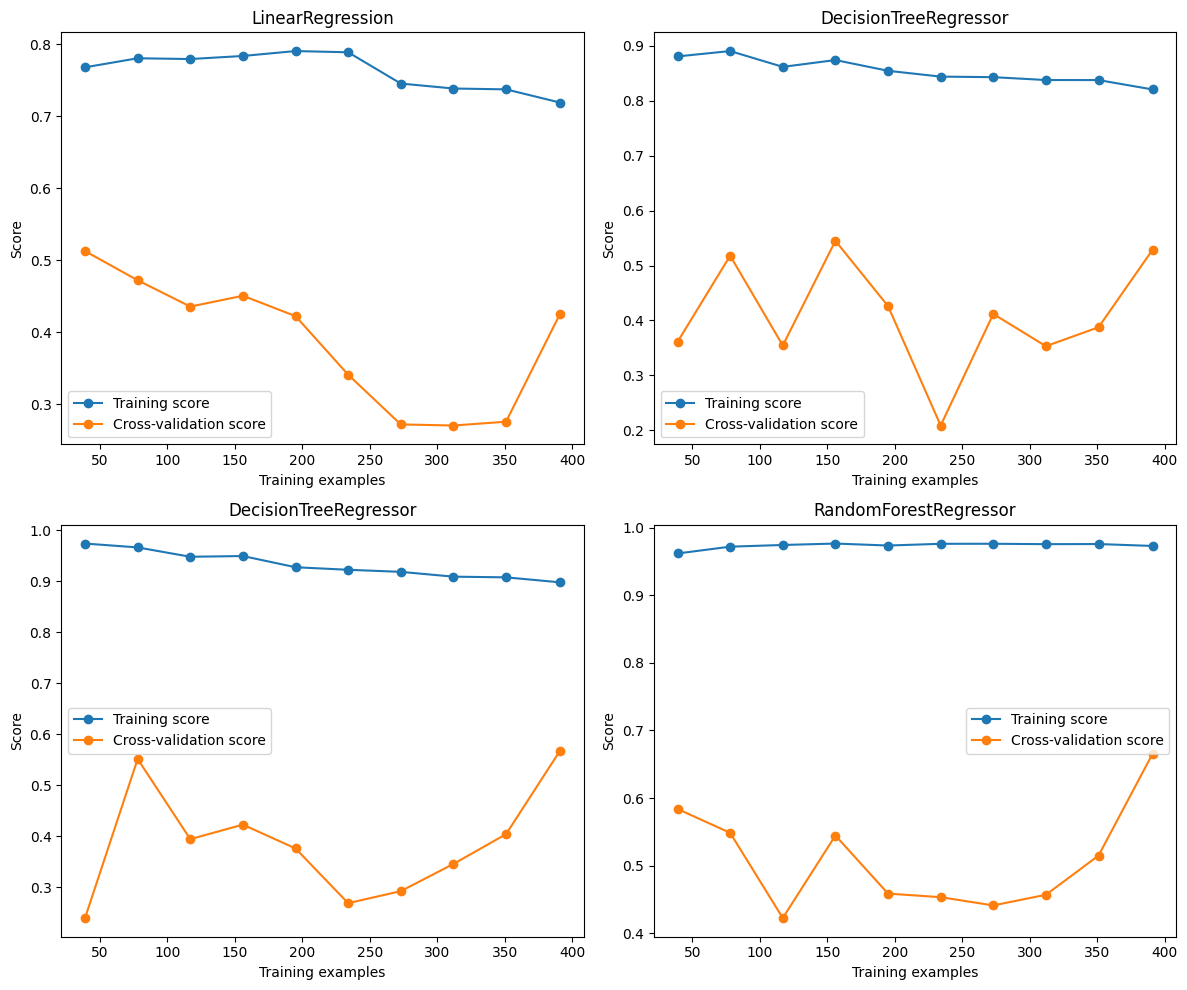

In [33]:
from sklearn.model_selection import learning_curve

def ModelLearning(features, prices):

    warnings.filterwarnings('ignore')


    from sklearn.linear_model import LinearRegression
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import RandomForestRegressor

    models = [
        LinearRegression(),
        DecisionTreeRegressor(max_depth=3),
        DecisionTreeRegressor(max_depth=5),
        RandomForestRegressor(n_estimators=50)
    ]

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    for model, ax in zip(models, axes.ravel()):
        train_sizes, train_scores, test_scores = learning_curve(
            model, features, prices, cv=5,
            train_sizes=np.linspace(0.1, 1.0, 10)
        )

        train_scores_mean = np.mean(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)

        ax.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
        ax.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score")
        ax.set_title(type(model).__name__)
        ax.legend()
        ax.set_xlabel("Training examples")
        ax.set_ylabel("Score")

    plt.tight_layout()
    plt.show()


ModelLearning(features, prices)

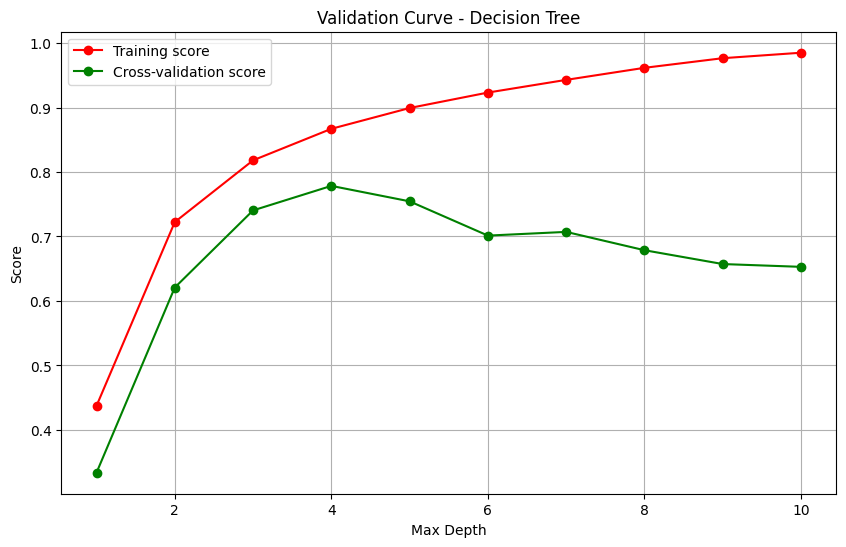

In [35]:
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
import numpy as np

def ModelComplexity(X_train, y_train):

    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import RandomForestRegressor

    # Example with Decision Tree max_depth
    param_range = range(1, 11)
    train_scores, test_scores = validation_curve(
        DecisionTreeRegressor(), X_train, y_train,
        param_name="max_depth", param_range=param_range,
        cv=5, scoring="r2"
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(param_range, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(param_range, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.title("Validation Curve - Decision Tree")
    plt.xlabel("Max Depth")
    plt.ylabel("Score")
    plt.legend()
    plt.grid(True)
    plt.show()

# Use it
ModelComplexity(X_train, y_train)

In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a
        decision tree regressor trained on the input data [X, y]. """

    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], test_size = 0.20, random_state = 0)

    regressor = DecisionTreeRegressor()
    params = {'max_depth': range(1,11)}
    scoring_fnc = make_scorer(performance_metric)
    grid = GridSearchCV(regressor,params,scoring=scoring_fnc,cv=cv_sets)
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [37]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


In [38]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $401,333.33
Predicted selling price for Client 2's home: $240,947.37
Predicted selling price for Client 3's home: $893,700.00
